# 1. 线性回归

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 使用numpy随机生成200个均匀分布的点
# newaxis增加了一个维度
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]
# print(x_data[:10])

# 增加一些随机噪声
noise = np.random.normal(0, 0.02, x_data.shape)

y_data = np.square(x_data) + noise

#根据样本x_data和y_data的形状定义两个placeholder，行不确定，1列
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32, [None,1])
 

In [12]:
# 定义神经网络中间层
# 1个input，hidden层10个神经元
Weight_L1 = tf.Variable(tf.random_normal([1, 10]))
biases_L1 = tf.Variable(tf.zeros([1, 10]))
Wx_plus_b_L1 = tf.matmul(x, Weight_L1) + biases_L1
# 双曲正切函数 激活
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义神经网络输出层
# 10个hidden层神经元，1个output神经元
Weight_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weight_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))

# 梯度下降法训练
# 学习率0.1
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


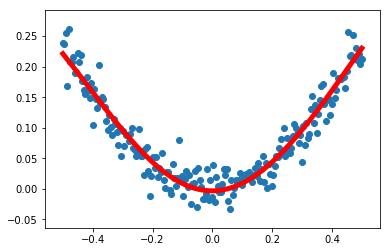

In [13]:
with tf.Session() as sess:
    # 使用了Variable，需要初始化
    sess.run(tf.global_variables_initializer())
    
    # 迭代2000次
    for _ in range(2000):
        sess.run(train_step, feed_dict = {x: x_data, y: y_data})
        
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x: x_data})
    
    #画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()
    

# 2. 手写数字识别

## 2.1 MNIST数据集
* MNIST数据集的官网：[Yann LeCun's website](http://yann.lecun.com/exdb/mnist/)
* 下载下来的数据集被分成两部分: 60000行的训练数据集（mnist.train）和10000行的测试数据
* 每一张图片包含28*28个像素，我们把这一个数组展开成一个向量，长度是28*28=784。因此在MNIST训练数据集中mnist.train.images是一个形状为[60000, 784]的张量，第一个维度数字用来索引图片，第二个维度数字用来索引每张图片中的像素点。图片里的某个像素的强度值介于0-1之间。
![](http://upload-images.jianshu.io/upload_images/1791718-dbaaf506c5c33a97.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
* MNIST数据集的标签是介于0-9的数字，我们要把标签转化为“one-hot vectors”。一个one-hot向量除了某一位数字是1以外，其余维度数字都是0，比如标签0将表示为([1,0,0,0,0,0,0,0,0,0])，标签3将表示为([0,0,0,1,0,0,0,0,0,0])。
* 因此，mnist.train.labels是一个[60000, 10]的数字矩阵。
![](http://upload-images.jianshu.io/upload_images/1791718-b60d5f220bab1a86.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 2.2 神经网络构建
* 不加隐藏层，输入是784个像素点，输出是长度为10的one-hot
![](http://upload-images.jianshu.io/upload_images/1791718-71e1dd4b16853f75.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

## 2.3 Softmax函数
* 我们知道MNIST的结果是0-9，我们的模型可能推测出一张图片是数字9的概率是80%，是数字8的概率是10%，然后其他数字的概率更小，总体概率加起来等于1。这是一个使用softmax回归模型的经典案例。softmax模型可以用来给不同的对象分配概率。
$$softmax(x)_i=\frac{exp(x_i)}{\sum_j{exp(x_j)}}$$

## 2.4 TensorFlow手写数字识别
要提高识别准确率，可以考虑：
* 增加隐藏层
* 修改batch_size
* 采用不同的值初始化权重
* 增加迭代次数
* 使用交叉熵代价函数
* 使用其他optimizer
* 修改学习率


In [14]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
# 载入数据集
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# 每个批次的大小
batch_size = 64
# 计算一共有多少个批次（//代表整除）
n_batch = mnist.train.num_examples // batch_size

# 定义两个placeholder
# batch是64，则None是64，784=28x28
x = tf.placeholder(tf.float32,[None, 784])
# y是label，0-9共10个数字
y = tf.placeholder(tf.float32,[None, 10])

# 创建一个简单的神经网络
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W) + b)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

# argmax返回一维张量中最大的值所在的位置，即0-9共10个class中哪个class的概率最大
# 结果存放在一个布尔型列表中
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(prediction, 1))

# 求准确率
# cast把bool型转换为float型，[True, True, False] -> [1.0 , 1.0, 0.0]，准确率66%
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


In [ ]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs, batch_ys =  mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})
        
        acc = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
        print("Iter " + str(epoch) + ", Testing Accuracy " + str(acc))
